In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import control
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Read Excel Data

In [4]:
df = pd.read_excel('System Analysis.xlsx')

In [5]:
t = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Peak Analysis

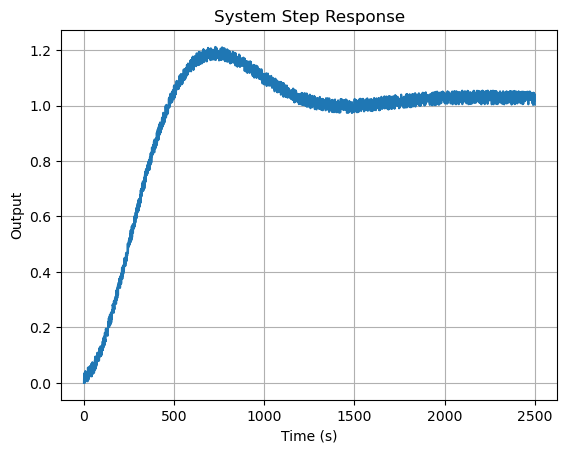

In [6]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

## Performs Complete Analysis of the Closed Loop Response

In [7]:
def step_response_parameters(t, y):
    overshoot = np.max(y)
    overshoot
    
    # Find the index of the first value equal to overshoot
    idx_peak = np.argwhere(y == overshoot).flatten()[0]
    
    # Find the index of the first value greater than or equal 90% of last value
    idx_rise_90 = np.argwhere(y >= 0.9*y[-1]).flatten()[0]
    
    # Find the index of the first value greater than or equal 10% of last value
    idx_rise_10 = np.argwhere(y >= 0.1*y[-1]).flatten()[0]
    
    rise_time = (t[idx_rise_90] - t[idx_rise_10]).flatten()[0]
    settling_time = (t[-1] - t[idx_rise_90]).flatten()[0]
    settling_min = np.min(y[idx_peak:])
    settling_max = np.max(y[idx_peak:])
    
    overshoot = ((settling_max  - y[-1])/y[-1]) * 100
    undershoot = ((y[-1] - settling_min)/y[-1]) * 100
    peak = (y[idx_peak]).flatten()[0]
    peak_time = (t[idx_peak]).flatten()[0]
    
    print("Rise time: {:.2f} s".format(rise_time))
    print("Settling time: {:.2f} s".format(settling_time))
    print("Settling minimum: {:.2f}".format(settling_min))
    print("Settling maximum: {:.2f}".format(settling_max))
    print("Overshoot: {:.2f}%".format(overshoot))
    print("Undershoot: {:.2f}%".format(undershoot))
    print("Peak: {:.2f}".format(peak))
    print("Peak time: {:.2f} s".format(peak_time))

    return rise_time, settling_time, settling_min, settling_max, overshoot, undershoot, peak, peak_time

In [8]:
rise_time, settling_time, settling_min, settling_max, overshoot, undershoot, peak, peak_time = step_response_parameters(t,y)

Rise time: 336.00 s
Settling time: 2091.00 s
Settling minimum: 0.97
Settling maximum: 1.21
Overshoot: 20.68%
Undershoot: 2.99%
Peak: 1.21
Peak time: 728.00 s
